In [201]:
# importing the libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8) #adjust the configuration of the plots we'll creat


from sklearn.linear_model import LinearRegression

In [202]:
df = pd.read_csv("/Users/halef/Desktop/portfolio_python/ASELSAN-2017-2022.csv", sep=",", parse_dates =["Date"])

# CURRENCY IN TRY

In [203]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-15,11.00,11.06,10.92,11.03,10.695765,7122628
1,2017-06-16,11.03,11.08,10.92,10.92,10.589099,7462226
2,2017-06-19,10.95,10.97,10.90,10.90,10.569703,4526662
3,2017-06-20,10.92,10.97,10.84,10.85,10.521218,4386578
4,2017-06-21,10.86,11.04,10.77,10.99,10.656976,9809562


In [204]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1277 non-null   datetime64[ns]
 1   Open       1277 non-null   float64       
 2   High       1277 non-null   float64       
 3   Low        1277 non-null   float64       
 4   Close      1277 non-null   float64       
 5   Adj Close  1277 non-null   float64       
 6   Volume     1277 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 70.0 KB


In [206]:
df.isna().sum() # there is no null value

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [207]:
df["year"] = df["Date"].dt.to_period("Y")

In [208]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,year
0,2017-06-15,11.00,11.06,10.92,11.03,10.695765,7122628,2017
1,2017-06-16,11.03,11.08,10.92,10.92,10.589099,7462226,2017
2,2017-06-19,10.95,10.97,10.90,10.90,10.569703,4526662,2017
3,2017-06-20,10.92,10.97,10.84,10.85,10.521218,4386578,2017
4,2017-06-21,10.86,11.04,10.77,10.99,10.656976,9809562,2017


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1277 non-null   datetime64[ns]
 1   Open       1277 non-null   float64       
 2   High       1277 non-null   float64       
 3   Low        1277 non-null   float64       
 4   Close      1277 non-null   float64       
 5   Adj Close  1277 non-null   float64       
 6   Volume     1277 non-null   int64         
 7   year       1277 non-null   period[A-DEC] 
dtypes: datetime64[ns](1), float64(5), int64(1), period[A-DEC](1)
memory usage: 79.9 KB


In [212]:
df.groupby(by="year").mean()

,Open,High,Low,Close,Adj Close,Volume
year,,,,,,
2017,14.049296,14.304084,13.831127,14.063591,13.646004,1.942846e+07
2018,13.605556,13.784789,13.392759,13.561073,13.185279,3.285158e+07
2019,10.049423,10.170769,9.907577,10.018077,9.783640,2.954822e+07
2020,15.472421,15.739087,15.235119,15.469881,15.231965,5.656233e+07
2021,16.828193,17.086627,16.597510,16.808554,16.676527,2.954961e+07
2022,23.790797,24.208496,23.366814,23.727965,23.727965,5.452224e+07


In [215]:
for col in df.columns:
    df_missing = np.mean(df[col].isnull())
    print(f"{col} -- {df_missing}%")

Date -- 0.0%
Open -- 0.0%
High -- 0.0%
Low -- 0.0%
Close -- 0.0%
Adj Close -- 0.0%
Volume -- 0.0%
year -- 0.0%


In [216]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
year          period[A-DEC]
dtype: object

In [217]:
df["year"].value_counts()

2018    261
2019    260
2020    252
2021    249
2017    142
2022    113
Freq: A-DEC, Name: year, dtype: int64

In [218]:
df.sort_values(by=["Volume"], inplace=False, ascending=False)

,Date,Open,High,Low,Close,Adj Close,Volume,year
692,2020-02-12,12.860000,14.340000,12.860000,13.980000,13.732507,295346012,2020
849,2020-09-30,18.459999,19.799999,18.110001,19.459999,19.172194,223781506,2020
804,2020-07-27,17.620001,19.110001,17.540001,18.820000,18.541660,189329344,2020
736,2020-04-14,12.600000,13.710000,12.600000,13.640000,13.398526,186452112,2020
808,2020-08-04,18.000000,18.219999,16.469999,17.200001,16.945621,182412324,2020
...,...,...,...,...,...,...,...,...
228,2018-05-01,12.590000,12.590000,12.590000,12.590000,12.229243,0,2018
222,2018-04-23,13.310000,13.310000,13.310000,13.310000,12.928611,0,2018
542,2019-07-15,8.350000,8.350000,8.350000,8.350000,8.159475,0,2019
712,2020-03-11,13.030000,13.030000,13.030000,13.030000,12.799326,0,2020


In [219]:
df["difference"] = df["Open"] - df["Adj Close"]

# THE DIFFERENCE VALUE BETWEEN OPEN AND ADJ CLOSE PRICE IN STOCKS

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1277 non-null   datetime64[ns]
 1   Open        1277 non-null   float64       
 2   High        1277 non-null   float64       
 3   Low         1277 non-null   float64       
 4   Close       1277 non-null   float64       
 5   Adj Close   1277 non-null   float64       
 6   Volume      1277 non-null   int64         
 7   year        1277 non-null   period[A-DEC] 
 8   difference  1277 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), period[A-DEC](1)
memory usage: 89.9 KB


Text(0.5, 0, 'Volume in mil')

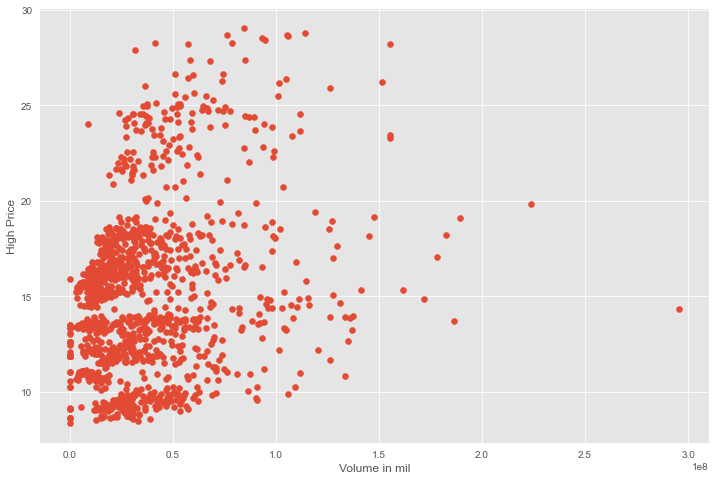

In [221]:
plt.scatter(x=df["Volume"],y=df["High"])
plt.ylabel("High Price")
plt.xlabel("Volume in mil")


<AxesSubplot:xlabel='High', ylabel='Volume'>

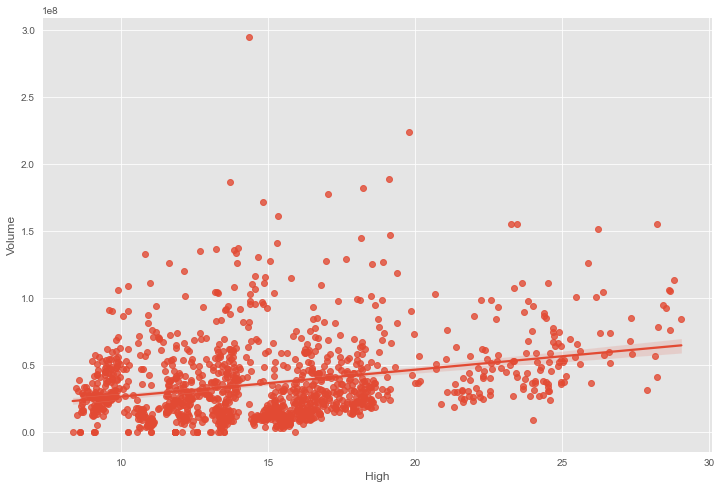

In [222]:
sns.regplot(x="High",y="Volume",data=df)

<AxesSubplot:xlabel='Volume', ylabel='difference'>

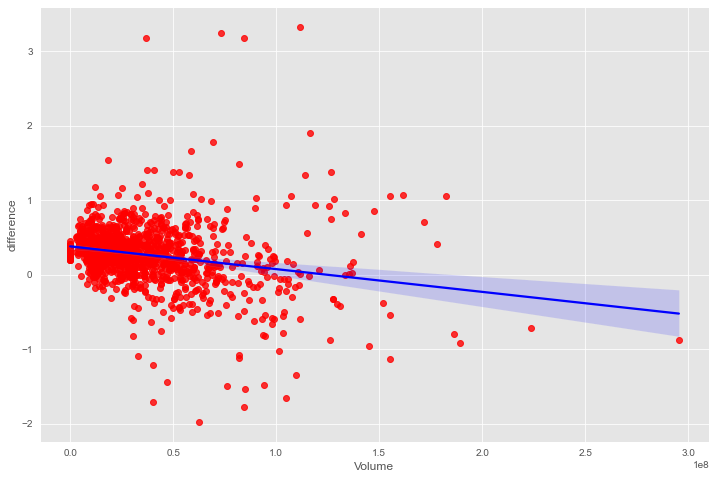

In [223]:
sns.regplot(x="Volume",y="difference",data=df, scatter_kws= {"color": "red"}, line_kws= {"color": "blue"})

In [224]:
df.corr("pearson") # pearson, kendall, spearnman

,Open,High,Low,Close,Adj Close,Volume,difference
Open,1.000000,0.997930,0.997275,0.995437,0.995150,0.245724,-0.050231
High,0.997930,1.000000,0.995727,0.997384,0.997015,0.277873,-0.089984
Low,0.997275,0.995727,1.000000,0.997742,0.997464,0.233543,-0.101122
Close,0.995437,0.997384,0.997742,1.000000,0.999623,0.263588,-0.141516
Adj Close,0.995150,0.997015,0.997464,0.999623,1.000000,0.265741,-0.148232
Volume,0.245724,0.277873,0.233543,0.263588,0.265741,1.000000,-0.227678
difference,-0.050231,-0.089984,-0.101122,-0.141516,-0.148232,-0.227678,1.000000


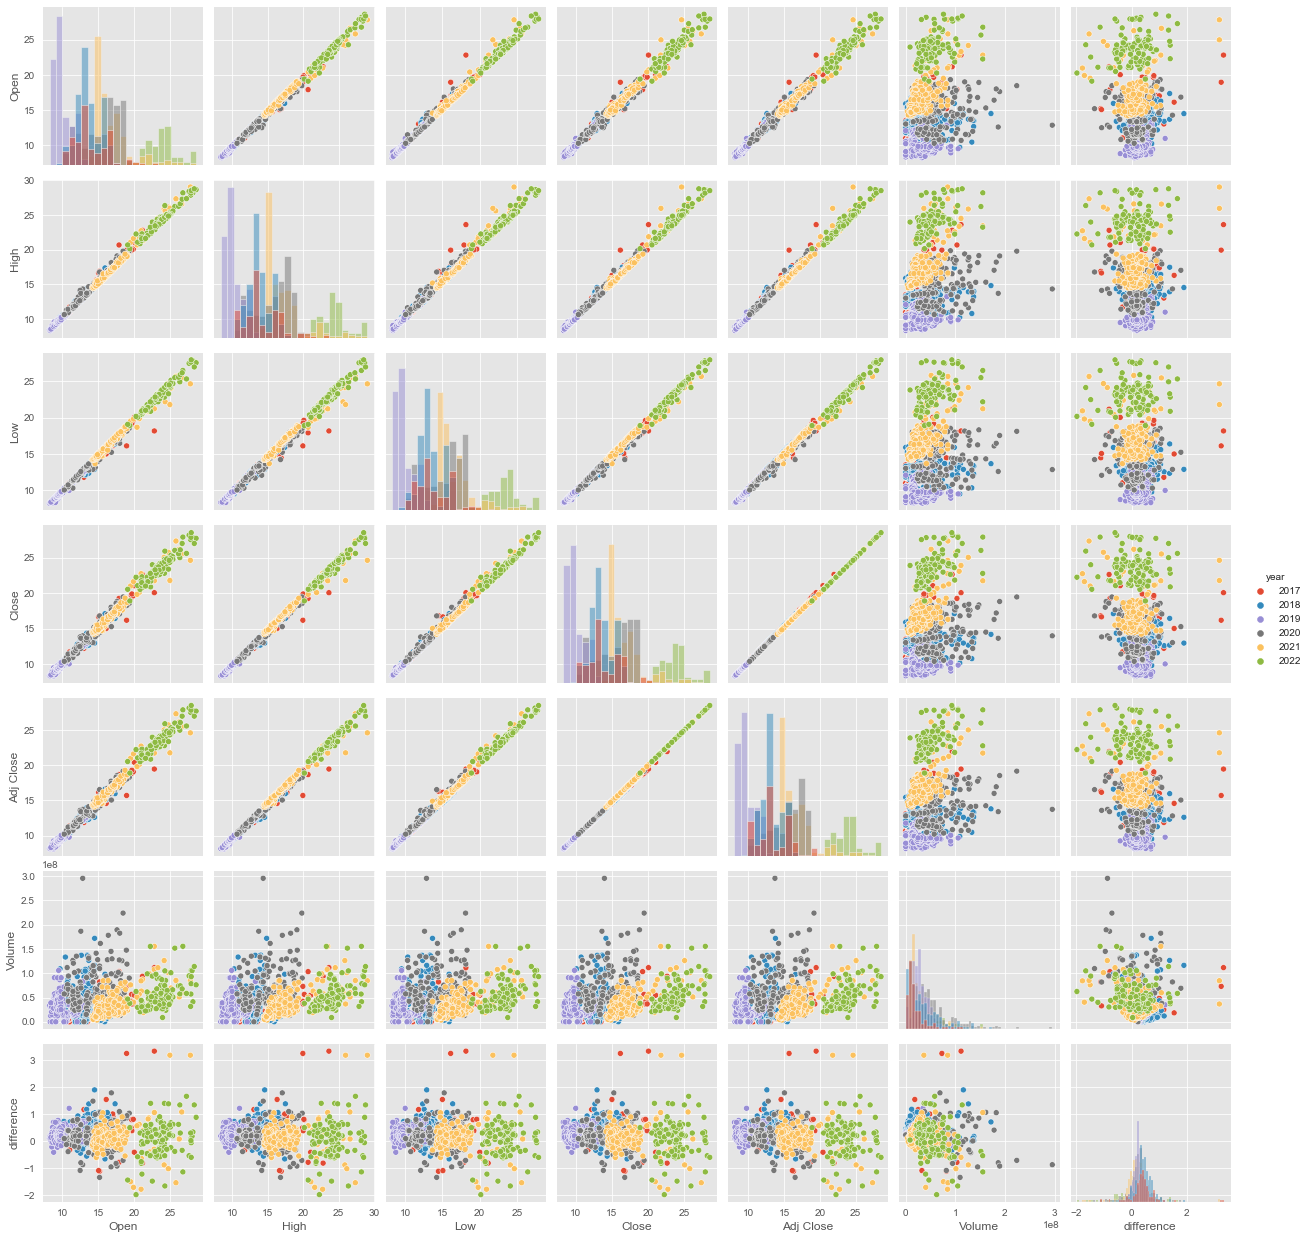

In [227]:
sns.pairplot(df, hue="year", diag_kind="hist")
plt.show()


In [ ]:
# it is now seen that green means 2022 

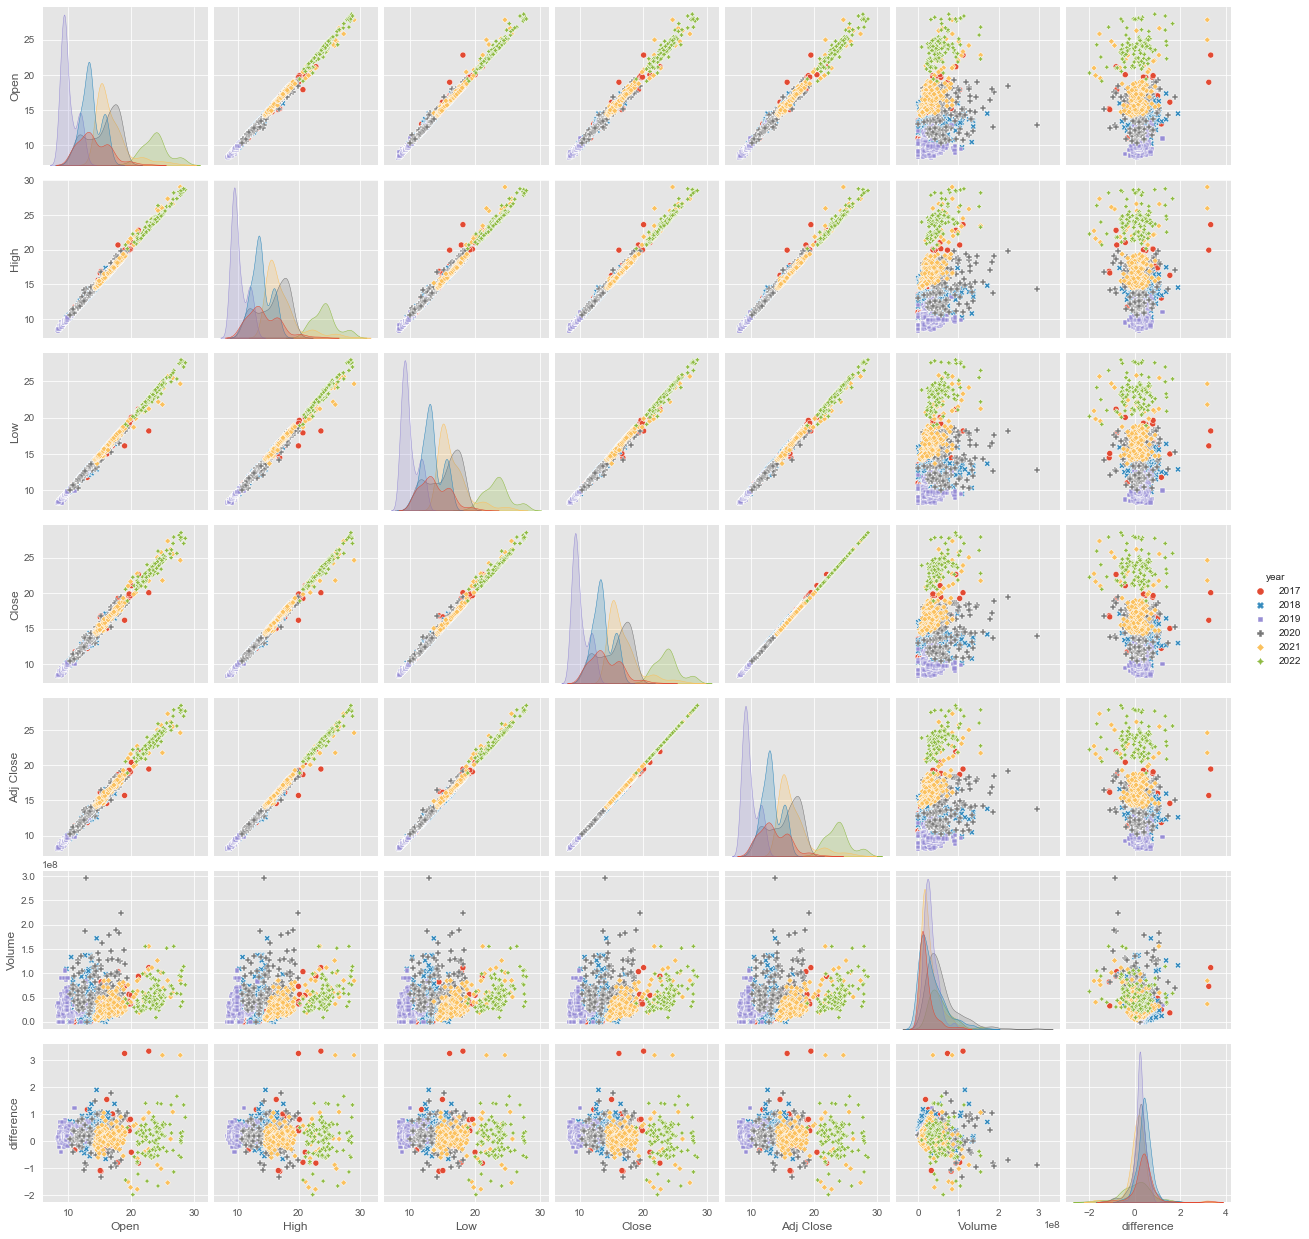

In [229]:
sns.pairplot(df, hue="year", markers=True, diag_kind="kde")

In [119]:
selected_dates = df["year"].unique()

In [121]:
selected_dates

<PeriodArray>
['2017', '2018', '2019', '2020', '2021', '2022']
Length: 6, dtype: period[A-DEC]

In [139]:
df["year"].astype('datetime64[ns]') 

0      2017-01-01
1      2017-01-01
2      2017-01-01
3      2017-01-01
4      2017-01-01
          ...    
1272   2022-01-01
1273   2022-01-01
1274   2022-01-01
1275   2022-01-01
1276   2022-01-01
Name: year, Length: 1277, dtype: datetime64[ns]

In [233]:
selected_dates = df["year"].unique().astype(str)

In [234]:
selected_dates

array(['2017', '2018', '2019', '2020', '2021', '2022'], dtype='<U4')

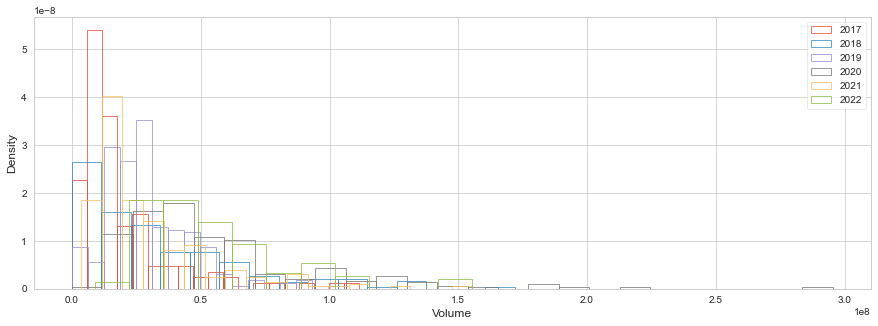

In [301]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
colors = ["Green","Orange","Red","Gray","Purple","Yellow"]
for year, color in zip(selected_dates, colors):
    avg_volume = df[df["year"]==year]["Volume"]
    sns.histplot(avg_volume, cbar=True, fill =False, stat="density")
    
plt.legend(selected_dates)  

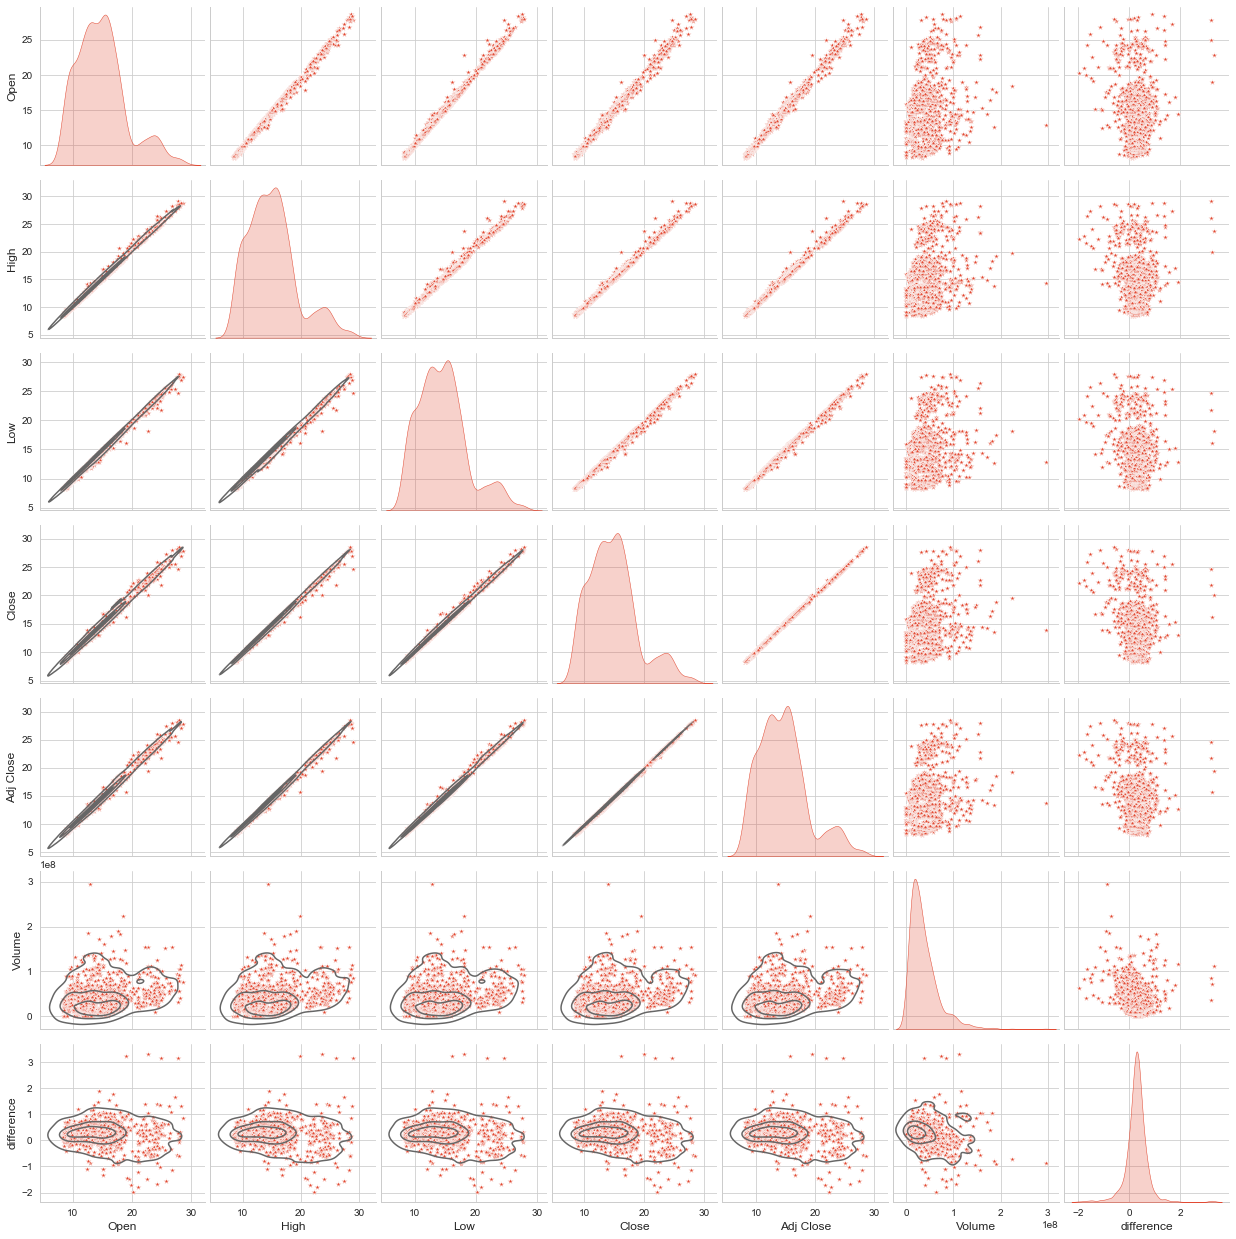

In [275]:
g = sns.pairplot(df, markers="*", diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".4")

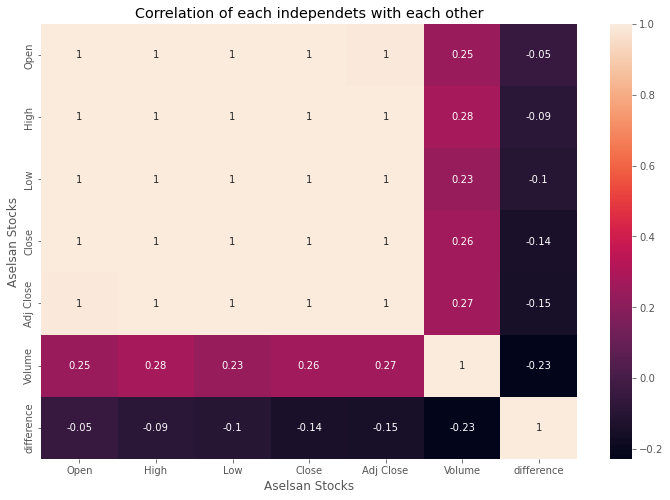

In [29]:
corr_matrix = df.corr("pearson")
sns.heatmap(corr_matrix, annot=True)

plt.title("Correlation of each independets with each other")
plt.xlabel("Aselsan Stocks")
plt.ylabel("Aselsan Stocks")

plt.show()

# there is a significant low correlation between volume and difference that is substraction the adj 
# close from open price
# It means that there is a negative correlation. 
# We can indicate that when the number of shares traded in stocks of Aselsan increases,
# the difference between the open and close prices are decreasing
# Finally, it shows that consumers buy stocks in Aselsan according to this 5-year data taken in kaggle. 

In [31]:
corr_mat = df.corr()

In [32]:
corr_pairs = corr_mat.unstack()


In [33]:
corr_pairs

Open        Open          1.000000
            High          0.997930
            Low           0.997275
            Close         0.995437
            Adj Close     0.995150
            Volume        0.245724
            difference   -0.050231
High        Open          0.997930
            High          1.000000
            Low           0.995727
            Close         0.997384
            Adj Close     0.997015
            Volume        0.277873
            difference   -0.089984
Low         Open          0.997275
            High          0.995727
            Low           1.000000
            Close         0.997742
            Adj Close     0.997464
            Volume        0.233543
            difference   -0.101122
Close       Open          0.995437
            High          0.997384
            Low           0.997742
            Close         1.000000
            Adj Close     0.999623
            Volume        0.263588
            difference   -0.141516
Adj Close   Open    

In [35]:
sorted_pairs = corr_pairs.sort_values(ascending=False)

In [36]:
sorted_pairs

Open        Open          1.000000
High        High          1.000000
Volume      Volume        1.000000
Adj Close   Adj Close     1.000000
Low         Low           1.000000
Close       Close         1.000000
difference  difference    1.000000
Adj Close   Close         0.999623
Close       Adj Close     0.999623
High        Open          0.997930
Open        High          0.997930
Low         Close         0.997742
Close       Low           0.997742
Adj Close   Low           0.997464
Low         Adj Close     0.997464
Close       High          0.997384
High        Close         0.997384
Low         Open          0.997275
Open        Low           0.997275
Adj Close   High          0.997015
High        Adj Close     0.997015
Low         High          0.995727
High        Low           0.995727
Open        Close         0.995437
Close       Open          0.995437
Adj Close   Open          0.995150
Open        Adj Close     0.995150
High        Volume        0.277873
Volume      High    

In [130]:
#calculate sum of volume grouped by years
number_of_volume = df['Volume'].groupby(df['Date'].dt.to_period('Y') ).sum().sort_values(ascending=False)

# as it is seen that volume, that is, number of shares traded had reached the highest value with 
# 14 billion TL in 2020.
# and 2018 follows the 2022 with as many as 8.5 billion TL
# and the lowest number is in 2017.

In [131]:
number_of_volume

Date
2020    14253707652
2018     8574262552
2019     7682537116
2021     7357853578
2022     6161013025
2017     2758841622
Freq: A-DEC, Name: Volume, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='Open'>

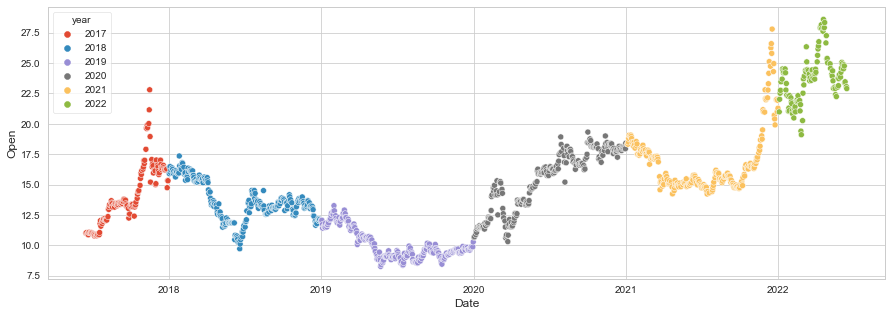

In [302]:
## this code shows the graphic of Open prrice according to date between 2017 and 2022.
# in this graph, each color has one unique year.

plt.figure(figsize=(15,5))

sns.scatterplot(x="Date",y= "Open", data=df, hue="year")

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

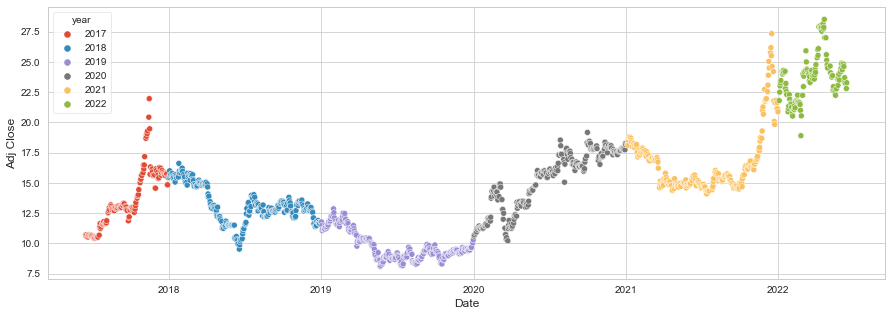

In [312]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x="Date" ,y= "Adj Close", hue="year")

# There is a decrease between 2018 and 2019 but the increase starts in late 2019. In addition, there is similar situation between 2021 and 2022.
# As a result, there is a wavy line, but the opening price in stocks constantly increases.

<AxesSubplot:xlabel='Date', ylabel='Volume'>

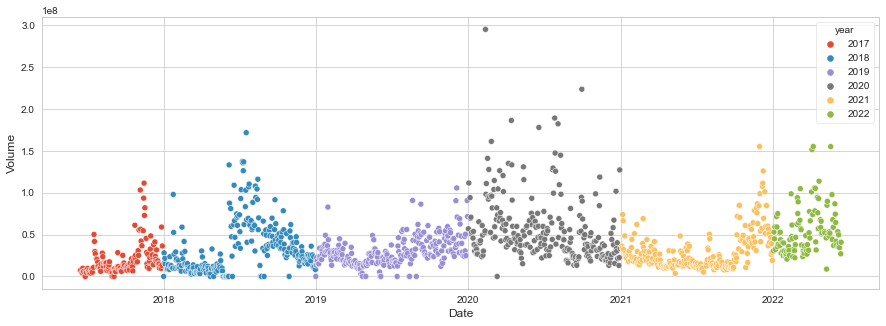

In [313]:
plt.figure(figsize=(15,5))

sns.scatterplot(x="Date", y = "Volume", data=df, hue="year")

In [ ]:
# it is seen by graph that between 2020 and 2021, there is much more number of shares traded 
# and 2018 is in the second number according to volume.

In [319]:
df['Volume'].groupby(df["year"] ).sum().sort_values(ascending=False)

year
2020    14253707652
2018     8574262552
2019     7682537116
2021     7357853578
2022     6161013025
2017     2758841622
Freq: A-DEC, Name: Volume, dtype: int64

Text(0.5, 1.0, 'High vs Low')

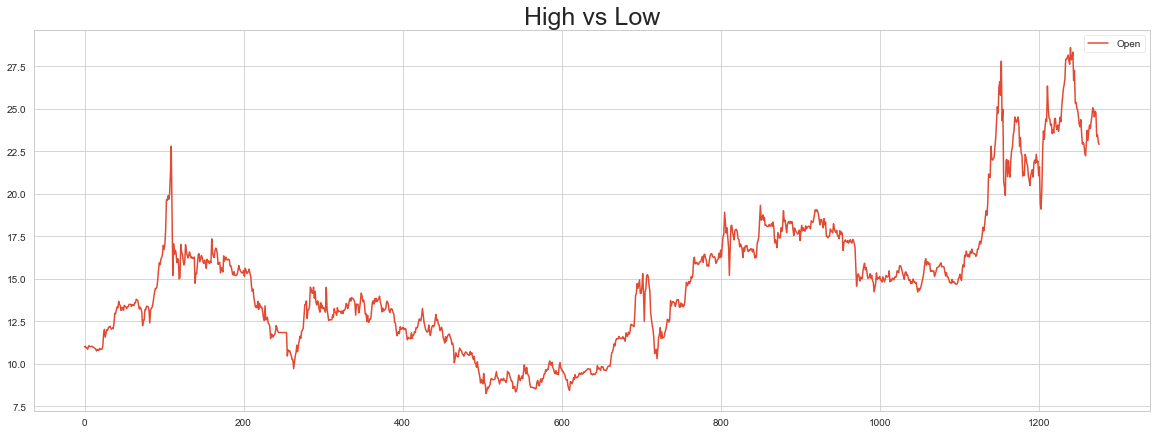

In [322]:
fx = df[['year',"Open"]].plot(figsize=(20,7))
fx.set_title("High vs Low",fontsize=25)

In [ ]:
# the opening price is constantly rising up.